In [1]:
#### now add the mapillary info

In [2]:
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
from tqdm import tqdm

### get mapillary_coverage

In [3]:
# ndissolved works well, however rather want to work with dissolved and cut TODOO

#mapillary_coverage = gpd.read_parquet(r"mapillary_coverage_23_bb_buffered10m_dissolved.parquet")
#mapillary_coverage = gpd.read_parquet(r"mapillary_coverage_23_berlin_buffered10m_dissolved.parquet")

#mapillary_coverage = gpd.read_parquet(r"mapillary_coverage_23_germany_buffered10m_dissolved_pano_25-04-06.parquet")
#mapillary_coverage = gpd.read_parquet(r"mapillary_coverage_23_germany_buffered10m_dissolved_all_25-04-06.parquet")

mapillary_coverage = gpd.read_parquet(r"output_germany_2025-05_combined/mapillary_coverage_germany_buffered10m_dissolved_23-01-01_until_25-05-11.parquet")


In [4]:
mapillary_coverage

,tile_x,tile_y,is_pano,geometry
0,8460.0,5483.0,False,"MULTIPOLYGON (((282716.872 5655992.386, 282712..."
1,8460.0,5484.0,False,"MULTIPOLYGON (((282328.46 5654396.048, 282318...."
2,8461.0,5481.0,False,"MULTIPOLYGON (((283887.542 5658968.623, 283888..."
3,8461.0,5482.0,False,"MULTIPOLYGON (((284045.731 5658147.9, 284047.6..."
4,8461.0,5483.0,False,"MULTIPOLYGON (((283390.095 5655933.4, 283386.6..."
...,...,...,...,...
74038,8875.0,5463.0,False,"POLYGON ((918619.904 5700667.743, 918636.645 5..."
74039,8875.0,5464.0,False,"MULTIPOLYGON (((920371.679 5697775.035, 920369..."
74040,8875.0,5465.0,False,"MULTIPOLYGON (((920438.932 5697242.111, 920438..."
74041,8875.0,5466.0,False,"POLYGON ((919470.001 5694817.854, 919465.495 5..."


In [5]:
## nur für pano
#mapillary_coverage=mapillary_coverage[mapillary_coverage["is_pano"]==True].copy()


mapillary_coverage = mapillary_coverage.to_crs(25832)

mapillary_clean = mapillary_coverage.explode(index_parts=False, ignore_index=True)
mapillary_clean

,tile_x,tile_y,is_pano,geometry
0,8460.0,5483.0,False,"POLYGON ((282716.872 5655992.386, 282712.529 5..."
1,8460.0,5483.0,False,"POLYGON ((282639.369 5656211.365, 282639.455 5..."
2,8460.0,5483.0,False,"POLYGON ((281884.688 5656242.821, 281775.811 5..."
3,8460.0,5483.0,False,"POLYGON ((282453.709 5657361.801, 282452.774 5..."
4,8460.0,5483.0,False,"POLYGON ((282896.747 5657079.92, 282896.046 56..."
...,...,...,...,...
134789,8875.0,5464.0,False,"POLYGON ((919904.27 5699217.379, 919904.613 56..."
134790,8875.0,5465.0,False,"POLYGON ((920438.932 5697242.111, 920438.881 5..."
134791,8875.0,5465.0,False,"POLYGON ((920395.484 5697755.99, 920397.014 56..."
134792,8875.0,5466.0,False,"POLYGON ((919470.001 5694817.854, 919465.495 5..."


In [6]:
#mapillary_coverage_pano=mapillary_coverage[mapillary_coverage["is_pano"]==True].copy()
#mapillary_coverage_npano=mapillary_coverage[mapillary_coverage["is_pano"]==False].copy()


### get the roads of interest

In [7]:
# osm_roads_2024_intersect_landuse.to_parquet("../output/roads_wo_maxspeed&accs_2024_urban.parquet")
# osm_roads = gpd.read_parquet("../osm_history_analysis/output/roads_wo_maxspeed&accs_2024_urban.parquet")
# osm_roads = gpd.read_parquet("processed_osm_files/berlin_highways_250401.parquet")


#osm_roads = gpd.read_parquet("processed_osm_files/processed_highways_germany_250405.parquet")
osm_roads = gpd.read_parquet("processed_osm_files/processed_highways_germany_250509.parquet")

In [8]:
osm_roads=osm_roads.to_crs(25832)

In [9]:
osm_roads['length_m_before_clip'] = osm_roads.geometry.length
osm_roads

,osm_id,name,highway,waterway,aerialway,barrier,man_made,railway,z_order,other_tags,geometry,length_m_before_clip
0,92,Eigenheimstraße,residential,None,None,None,None,None,3,"""lit""=>""yes"",""maxspeed""=>""30"",""maxweight""=>""3....","LINESTRING (832194.125 5662359.794, 832231.203...",386.707524
1,93,Eigenheimberg,residential,None,None,None,None,None,3,"""lit""=>""yes"",""maxspeed""=>""30"",""maxweight""=>""3....","LINESTRING (832362.761 5662377.712, 832384.518...",89.421440
2,99,None,tertiary,None,None,None,None,None,4,"""cycleway:right""=>""no"",""junction""=>""roundabout...","LINESTRING (675921.969 5338360.059, 675924.648...",36.439158
3,100,None,secondary,None,None,None,None,None,6,"""bicycle""=>""use_sidepath"",""foot""=>""use_sidepat...","LINESTRING (673224.184 5338944.301, 673220.116...",98.561214
4,103,Altmockritz,residential,None,None,None,None,None,3,"""maxspeed""=>""5"",""postal_code""=>""01217"",""source...","LINESTRING (832498.092 5662325.944, 832513.585...",97.989768
...,...,...,...,...,...,...,...,...,...,...,...,...
15296449,1385157866,None,path,None,None,None,None,None,0,"""description:de""=>""Forst- und Jagdsteig, nicht...","LINESTRING (727593.81 5282515.592, 727575.956 ...",98.619085
15296450,1385157868,None,path,None,None,None,None,None,0,"""sac_scale""=>""demanding_mountain_hiking"",""surf...","LINESTRING (727889.683 5282195.875, 727823.508...",66.256671
15296451,1385157869,None,path,None,None,None,None,None,0,"""sac_scale""=>""mountain_hiking"",""surface""=>""gro...","LINESTRING (728083.624 5282102.099, 728072.431...",61.323998
15296452,1385158040,Karl-Rittler-Straße,residential,None,None,None,None,None,3,"""maxspeed""=>""50"",""source:maxspeed""=>""DE:urban""...","LINESTRING (548607.93 5296992.037, 548602.735 ...",64.653014


In [10]:
## TODO: the following process for pano and non-pano:
## test for smaller area first

In [10]:
bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland=bland[bland["id"].isin(["DE-BE"])]

In [11]:
bland=bland.to_crs(25832)

In [12]:
mapillary_clean_clipped = gpd.clip(mapillary_clean, bland)
mapillary_clean_clipped

,tile_x,tile_y,is_pano,geometry
123726,8813.0,5385.0,True,"POLYGON ((817725.792 5810100.368, 817730.951 5..."
124106,8814.0,5385.0,True,"POLYGON ((817893.647 5810326.951, 817885.556 5..."
124102,8814.0,5384.0,False,"POLYGON ((817798.454 5812404.796, 817798.343 5..."
124488,8815.0,5384.0,True,"POLYGON ((819893.652 5812500.59, 819893.835 58..."
124103,8814.0,5384.0,True,"POLYGON ((819125.533 5812649.199, 819125.218 5..."
...,...,...,...,...
120488,8806.0,5362.0,True,"POLYGON ((803800.221 5844251.172, 803802.16 58..."
120484,8806.0,5362.0,False,"POLYGON ((803793.935 5844234.74, 803794.375 58..."
119994,8805.0,5362.0,False,"POLYGON ((802246.559 5844581.243, 802245.765 5..."
119989,8805.0,5361.0,False,"POLYGON ((802892.361 5845458.876, 802892.654 5..."


<Axes: >

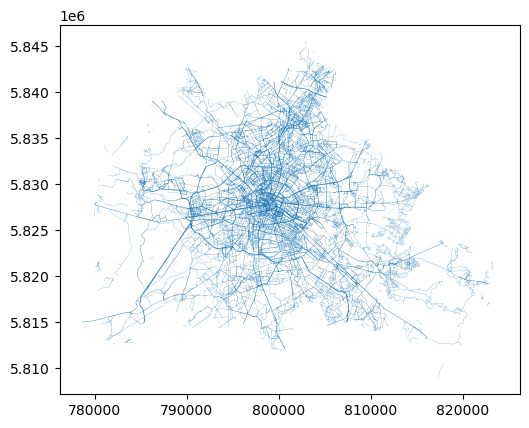

In [13]:
mapillary_clean_clipped.plot()

In [14]:
osm_roads_clipped = gpd.clip(osm_roads, bland)
osm_roads_clipped

,osm_id,name,highway,waterway,aerialway,barrier,man_made,railway,z_order,other_tags,geometry,length_m_before_clip
1933661,34282843,None,path,None,None,None,None,None,0,"""foot""=>""yes"",""lit""=>""no"",""surface""=>""ground""","LINESTRING (781867.342 5812263.282, 781821.178...",314.109498
1772538,32858548,None,track,None,None,None,None,None,0,"""motor_vehicle""=>""forestry"",""tracktype""=>""grade4""","LINESTRING (783844.789 5812762.442, 783848.409...",1395.003464
1772641,32858962,None,path,None,None,None,None,None,0,None,"LINESTRING (783663.679 5812648.614, 783656.256...",443.274417
5821578,184060395,None,track,None,None,None,None,None,0,"""lit""=>""no"",""motor_vehicle""=>""forestry"",""smoot...","LINESTRING (781794.614 5812185.745, 781793.522...",1563.177319
388397,23291292,Kohlhasenbrücker Straße,track,None,None,None,None,None,0,"""lit""=>""no"",""motor_vehicle""=>""forestry"",""name:...","MULTILINESTRING ((782041.143 5813070.098, 7820...",1008.366195
...,...,...,...,...,...,...,...,...,...,...,...,...
3031947,54428616,None,path,None,None,None,None,None,0,"""access""=>""private""","LINESTRING (786668.228 5838978.736, 786627.078...",123.710496
10896724,733572654,None,path,None,None,None,None,None,0,"""access""=>""destination"",""surface""=>""dirt""","LINESTRING (786587.563 5838971.653, 786572.414...",58.116703
8696307,394937701,S Heiligensee,platform,None,None,None,None,None,0,"""bench""=>""yes"",""bin""=>""yes"",""bus""=>""yes"",""chec...","LINESTRING (786242.109 5838982.401, 786256.528...",18.860326
8264773,356524693,None,footway,None,None,None,None,None,0,"""surface""=>""ground""","LINESTRING (786498.006 5838982.981, 786501.776...",34.986366


<Axes: >

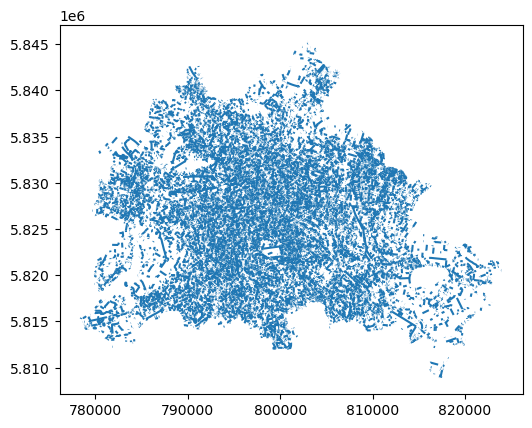

In [15]:
osm_roads_clipped[::10].plot()

### EXPERIMENTAL.....

In [16]:
network = osm_roads_clipped.copy()
mapillary_buffer_layer = mapillary_clean_clipped.copy()

In [ ]:
## to speed up the diff length calculation: the ida was to create a generic grid that would cut the mapillary buffer layer to make the polygones less complex...
## however the gain seems to be marginal....

In [17]:
from shapely.geometry import box
import geopandas as gpd
import numpy as np

def create_grid(bounds, cell_size):
    xmin, ymin, xmax, ymax = bounds
    rows = int(np.ceil((ymax - ymin) / cell_size))
    cols = int(np.ceil((xmax - xmin) / cell_size))
    grid_cells = []
    for i in range(cols):
        for j in range(rows):
            x1 = xmin + i * cell_size
            y1 = ymin + j * cell_size
            x2 = x1 + cell_size
            y2 = y1 + cell_size
            grid_cells.append(box(x1, y1, x2, y2))
    return gpd.GeoDataFrame(geometry=grid_cells, crs="25832")

# Example: 500m grid
grid = create_grid(mapillary_buffer_layer.total_bounds, cell_size=500)


In [18]:
# Spatial join polygons to grid
joined = gpd.sjoin(mapillary_buffer_layer, grid, predicate="intersects", how="inner")

# Intersect polygons with their grid cell
split_polys = gpd.overlay(joined, grid, how="intersection")

In [19]:
split_polys

,tile_x,tile_y,is_pano,index_right,geometry
0,8813.0,5385.0,True,5774,"POLYGON ((817730.951 5810111.307, 817736.105 5..."
1,8814.0,5385.0,True,5774,"POLYGON ((817885.556 5810316.989, 817885.431 5..."
2,8814.0,5384.0,False,5778,"POLYGON ((817798.343 5812405.772, 817798.329 5..."
3,8815.0,5384.0,True,6001,"POLYGON ((819436.37 5812747.293, 819436.342 58..."
4,8815.0,5384.0,True,6001,"POLYGON ((819893.835 5812501.571, 819895.929 5..."
...,...,...,...,...,...
74809,8805.0,5361.0,True,3625,"POLYGON ((802893.333 5845442.983, 802887.589 5..."
74810,8805.0,5361.0,True,3625,"POLYGON ((802947.69 5845380.911, 802951.218 58..."
74811,8805.0,5361.0,True,3698,"POLYGON ((802938.712 5845355.881, 802938.414 5..."
74812,8805.0,5361.0,True,3698,"POLYGON ((802893.333 5845442.983, 802887.589 5..."


In [21]:
network

,osm_id,name,highway,waterway,aerialway,barrier,man_made,railway,z_order,other_tags,geometry,length_m_before_clip
1933661,34282843,None,path,None,None,None,None,None,0,"""foot""=>""yes"",""lit""=>""no"",""surface""=>""ground""","LINESTRING (781867.342 5812263.282, 781821.178...",314.109498
1772538,32858548,None,track,None,None,None,None,None,0,"""motor_vehicle""=>""forestry"",""tracktype""=>""grade4""","LINESTRING (783844.789 5812762.442, 783848.409...",1395.003464
1772641,32858962,None,path,None,None,None,None,None,0,None,"LINESTRING (783663.679 5812648.614, 783656.256...",443.274417
5821578,184060395,None,track,None,None,None,None,None,0,"""lit""=>""no"",""motor_vehicle""=>""forestry"",""smoot...","LINESTRING (781794.614 5812185.745, 781793.522...",1563.177319
388397,23291292,Kohlhasenbrücker Straße,track,None,None,None,None,None,0,"""lit""=>""no"",""motor_vehicle""=>""forestry"",""name:...","MULTILINESTRING ((782041.143 5813070.098, 7820...",1008.366195
...,...,...,...,...,...,...,...,...,...,...,...,...
3031947,54428616,None,path,None,None,None,None,None,0,"""access""=>""private""","LINESTRING (786668.228 5838978.736, 786627.078...",123.710496
10896724,733572654,None,path,None,None,None,None,None,0,"""access""=>""destination"",""surface""=>""dirt""","LINESTRING (786587.563 5838971.653, 786572.414...",58.116703
8696307,394937701,S Heiligensee,platform,None,None,None,None,None,0,"""bench""=>""yes"",""bin""=>""yes"",""bus""=>""yes"",""chec...","LINESTRING (786242.109 5838982.401, 786256.528...",18.860326
8264773,356524693,None,footway,None,None,None,None,None,0,"""surface""=>""ground""","LINESTRING (786498.006 5838982.981, 786501.776...",34.986366


In [24]:
import geopandas as gpd


split_polys = split_polys.drop(columns=["index_right"], errors="ignore")

# Perform spatial join to get only intersecting roads
relevant_lines = gpd.sjoin(network, split_polys, how="inner", predicate="intersects")

# Drop duplicates in case roads intersect multiple polygons
relevant_lines = network.loc[relevant_lines.index].drop_duplicates().copy()

In [25]:
relevant_lines

,osm_id,name,highway,waterway,aerialway,barrier,man_made,railway,z_order,other_tags,geometry,length_m_before_clip
1772538,32858548,None,track,None,None,None,None,None,0,"""motor_vehicle""=>""forestry"",""tracktype""=>""grade4""","LINESTRING (783844.789 5812762.442, 783848.409...",1395.003464
1772641,32858962,None,path,None,None,None,None,None,0,None,"LINESTRING (783663.679 5812648.614, 783656.256...",443.274417
388397,23291292,Kohlhasenbrücker Straße,track,None,None,None,None,None,0,"""lit""=>""no"",""motor_vehicle""=>""forestry"",""name:...","MULTILINESTRING ((782041.143 5813070.098, 7820...",1008.366195
2492249,40774184,None,track,None,None,None,None,None,0,"""lit""=>""no"",""surface""=>""dirt"",""tracktype""=>""gr...","LINESTRING (782194.153 5812630.979, 782195.364...",117.524062
66614,4779627,None,track,None,None,None,None,None,0,"""lit""=>""no"",""motor_vehicle""=>""forestry"",""smoot...","LINESTRING (781987.288 5812619.651, 782075.854...",1620.890164
...,...,...,...,...,...,...,...,...,...,...,...,...
9220731,460995019,None,footway,None,None,None,None,None,0,"""surface""=>""paving_stones""","LINESTRING (786257.892 5838938.836, 786268.951...",16.134257
9220732,460995020,None,footway,None,None,None,None,None,0,"""surface""=>""paving_stones""","LINESTRING (786254.43 5838963.093, 786245.05 5...",39.797486
8722927,397624119,Ruppiner Chaussee,secondary,None,None,None,None,None,6,"""cycleway""=>""track"",""cycleway:left:surface""=>""...","LINESTRING (786328.223 5838897.652, 786317.64 ...",162.048941
8696307,394937701,S Heiligensee,platform,None,None,None,None,None,0,"""bench""=>""yes"",""bin""=>""yes"",""bus""=>""yes"",""chec...","LINESTRING (786242.109 5838982.401, 786256.528...",18.860326


In [33]:
network = osm_roads.copy()
mapillary_buffer_layer = mapillary_clean.copy()

In [34]:
len(network)


15296454

In [35]:
#mapillary_clean_clipped.plot()

In [38]:
### pano only:

## germany pano only: Processing roads: 100%|██████████| 15236515/15236515 [1:44:08<00:00, 2438.40it/s]  

## germany all: ~ 10h


from shapely.geometry import box
from tqdm import tqdm

def spatial_filter(gdf, geom):
    idx = gdf.sindex.query(geom, predicate="intersects")
    return gdf.iloc[idx]


#sample=osm_roads_2024_intersect_landuse[:1500].copy()
#sample=osm_roads_2024_intersect_landuse.copy()


network = osm_roads.copy()
mapillary_buffer_layer = mapillary_clean.copy()

mapillary_buffer_layer_pano=mapillary_buffer_layer[mapillary_buffer_layer.is_pano==True].copy()
mapillary_buffer_layer_regular=mapillary_buffer_layer[mapillary_buffer_layer.is_pano==False].copy()

clipped_lines_pano = []
clipped_lines_regular = []

clipped_gdf_pano = gpd.GeoDataFrame()
clipped_gdf_regular = gpd.GeoDataFrame()

for _, row in tqdm(network.iterrows(), total=len(network), desc="Processing roads"):
    bbox = box(*row.geometry.bounds)


    # do for pano and non-pano
    filtered_polys_pano = spatial_filter(mapillary_buffer_layer_pano, bbox) 
    filtered_polys_regular = spatial_filter(mapillary_buffer_layer_regular, bbox) 

    
    if not filtered_polys_pano.empty:
        clipped_pano = gpd.clip(gpd.GeoDataFrame([row], crs=network.crs), filtered_polys_pano)
        clipped_lines_pano.append(clipped_pano)

    if not filtered_polys_regular.empty:
        clipped_regular = gpd.clip(gpd.GeoDataFrame([row], crs=network.crs), filtered_polys_regular)
        clipped_lines_regular.append(clipped_regular)


# Combine all results
clipped_gdf_pano = gpd.GeoDataFrame(pd.concat(clipped_lines_pano, ignore_index=True), crs=network.crs)
clipped_gdf_regular = gpd.GeoDataFrame(pd.concat(clipped_lines_regular, ignore_index=True), crs=network.crs)


Processing roads: 100%|██████████| 15296454/15296454 [11:06:53<00:00, 382.29it/s]   


In [39]:
clipped_gdf_pano['length_m_after_clip'] = clipped_gdf_pano.geometry.length
clipped_gdf_pano["mp_coverage_ratio"] = clipped_gdf_pano["length_m_after_clip"] / clipped_gdf_pano["length_m_before_clip"]

clipped_gdf_regular['length_m_after_clip'] = clipped_gdf_regular.geometry.length
clipped_gdf_regular["mp_coverage_ratio"] = clipped_gdf_regular["length_m_after_clip"] / clipped_gdf_regular["length_m_before_clip"]


In [40]:
clipped_gdf_pano=clipped_gdf_pano[["osm_id", "highway", "mp_coverage_ratio", "length_m_before_clip", "length_m_after_clip", "geometry"]].copy()
clipped_gdf_pano.to_parquet("germany_osm-highways_25-05-09_mp_pano_coverage_25-05-10_ratio.parquet")

clipped_gdf_regular=clipped_gdf_regular[["osm_id", "highway", "mp_coverage_ratio", "length_m_before_clip", "length_m_after_clip", "geometry"]].copy()
clipped_gdf_regular.to_parquet("germany_osm-highways_25-05-09_mp_regular_coverage_25-05-10_ratio.parquet")

In [37]:
clipped_gdf_pano

,osm_id,highway,mp_coverage_ratio,length_m_before_clip,length_m_after_clip,geometry
0,1978,primary,1.000000,66.017066,66.017066,"LINESTRING (560704.881 5924993.391, 560746.381..."
1,1880866,residential,0.019283,498.687025,9.615933,"LINESTRING (559385.712 5925758.496, 559385.235..."
2,1880870,residential,0.020499,435.853088,8.934343,"LINESTRING (558952.398 5925821.928, 558951.364..."
3,1881164,residential,0.040049,222.833428,8.924277,"LINESTRING (559031.926 5925803.387, 559032.015..."
4,2293021,path,1.000000,109.656800,109.656800,"LINESTRING (644651.826 5494810.586, 644600.607..."
...,...,...,...,...,...,...
729,4071975,primary,1.000000,408.093128,408.093128,"LINESTRING (793984.906 5832007.377, 794146.24 ..."
730,4071976,residential,1.000000,100.902933,100.902933,"LINESTRING (795441.388 5833847.765, 795426.577..."
731,4071978,primary,0.999567,201.440019,201.352806,"LINESTRING (793218.814 5832397.605, 793226.726..."
732,4071979,secondary,0.354003,15.078935,5.337993,"LINESTRING (793588.972 5835202.236, 793589.942..."


In [ ]:
## germany pano only: Processing roads: 100%|██████████| 15236515/15236515 [1:44:08<00:00, 2438.40it/s]  

## germany all: ~ 10h


from shapely.geometry import box
from tqdm import tqdm

def spatial_filter(gdf, geom):
    idx = gdf.sindex.query(geom, predicate="intersects")
    return gdf.iloc[idx]


#sample=osm_roads_2024_intersect_landuse[:1500].copy()
#sample=osm_roads_2024_intersect_landuse.copy()


network = relevant_lines.copy()
mapillary_buffer_layer = mapillary_clean_clipped.copy()

mapillary_buffer_layer_pano=mapillary_buffer_layer[mapillary_buffer_layer.is_pano==True].copy()
mapillary_buffer_layer_regular=mapillary_buffer_layer[mapillary_buffer_layer.is_pano==False].copy()

clipped_lines_pano = []
clipped_lines_regular = []

clipped_gdf_pano = gpd.GeoDataFrame()
clipped_gdf_regular = gpd.GeoDataFrame()

for _, row in tqdm(network.iterrows(), total=len(network), desc="Processing roads"):
    bbox = box(*row.geometry.bounds)


    # do for pano and non-pano
    filtered_polys_pano = spatial_filter(mapillary_buffer_layer_pano, bbox) 
    filtered_polys_regular = spatial_filter(mapillary_buffer_layer_regular, bbox) 

    
    if not filtered_polys_pano.empty:
        clipped_pano = gpd.clip(gpd.GeoDataFrame([row], crs=network.crs), filtered_polys_pano)
        clipped_lines_pano.append(clipped_pano)

    if not filtered_polys_regular.empty:
        clipped_regular = gpd.clip(gpd.GeoDataFrame([row], crs=network.crs), filtered_polys_regular)
        clipped_lines_regular.append(clipped_regular)

# Combine all results
clipped_gdf_pano = gpd.GeoDataFrame(pd.concat(clipped_lines_pano, ignore_index=True), crs=network.crs)
clipped_gdf_regular = gpd.GeoDataFrame(pd.concat(clipped_lines_regular, ignore_index=True), crs=network.crs)

Processing roads:   0%|          | 0/216024 [00:00<?, ?it/s]

Processing roads:  32%|███▏      | 69391/216024 [04:06<08:41, 281.16it/s] 


KeyboardInterrupt: 

In [ ]:
# ### alternative: use overlay

# import geopandas as gpd

# # Ensure spatial indexes are built
# _ = mapillary_clean_clipped.sindex

# # Split pano and regular once
# mapillary_pano = mapillary_clean_clipped[mapillary_clean_clipped.is_pano].copy()
# mapillary_regular = mapillary_clean_clipped[~mapillary_clean_clipped.is_pano].copy()

# # Overlay (fast, vectorized intersection)
# clipped_gdf_pano = gpd.overlay(osm_roads_clipped, mapillary_pano, how='intersection')
# clipped_gdf_regular = gpd.overlay(osm_roads_clipped, mapillary_regular, how='intersection')

In [27]:
from shapely.geometry import box
from tqdm import tqdm
import geopandas as gpd


network = relevant_lines.copy()
mapillary_buffer_layer = mapillary_clean_clipped[::1000].copy()

# Ensure spatial index is built
_ = mapillary_buffer_layer.sindex

# Pre-filter pano/non-pano
pano_layer = mapillary_buffer_layer[mapillary_buffer_layer.is_pano].copy()
regular_layer = mapillary_buffer_layer[~mapillary_buffer_layer.is_pano].copy()

_ = pano_layer.sindex
_ = regular_layer.sindex

# Pre-allocate lists
clipped_pano = []
clipped_regular = []

# Reuse the same function and GeoDataFrame constructor
def clip_if_intersects(line_geom, polys, crs):
    bbox = box(*line_geom.bounds)
    filtered = polys.iloc[polys.sindex.query(bbox, predicate="intersects")]
    if not filtered.empty:
        return gpd.clip(gpd.GeoDataFrame(geometry=[line_geom], crs=crs), filtered)
    return None

# Iterate over rows
for row in tqdm(network.itertuples(), total=len(network), desc="Clipping roads"):
    line_geom = row.geometry
    pano_clip = clip_if_intersects(line_geom, pano_layer, network.crs)
    if pano_clip is not None:
        clipped_pano.append(pano_clip)

    regular_clip = clip_if_intersects(line_geom, regular_layer, network.crs)
    if regular_clip is not None:
        clipped_regular.append(regular_clip)

# Combine
clipped_gdf_pano = gpd.GeoDataFrame(pd.concat(clipped_pano, ignore_index=True), crs=network.crs)
clipped_gdf_regular = gpd.GeoDataFrame(pd.concat(clipped_regular, ignore_index=True), crs=network.crs)


Clipping roads:  31%|███▏      | 67927/216024 [00:24<00:53, 2759.24it/s]


KeyboardInterrupt: 

In [21]:
clipped_gdf_pano

,geometry,length_m_after_clip
0,"LINESTRING (783844.789 5812762.442, 783845.25 ...",9.158154
1,"LINESTRING (783657.071 5812740.743, 783656.256...",11.395185
2,"LINESTRING (782074.642 5812636.028, 782075.854...",20.276455
3,"LINESTRING (782194.153 5812630.979, 782194.843...",10.278972
4,"LINESTRING (781987.288 5812619.651, 782075.854...",227.155632
...,...,...
149083,"LINESTRING (786257.892 5838938.836, 786268.951...",16.134257
149084,"LINESTRING (786254.43 5838963.093, 786245.05 5...",36.269099
149085,"LINESTRING (786328.223 5838897.652, 786317.64 ...",148.868903
149086,"LINESTRING (786242.109 5838982.401, 786256.528...",18.860326


In [20]:
clipped_gdf_pano

,geometry,length_m_after_clip
0,"LINESTRING (783844.789 5812762.442, 783845.25 ...",9.158154
1,"LINESTRING (783657.071 5812740.743, 783656.256...",11.395185
2,"LINESTRING (782074.642 5812636.028, 782075.854...",20.276455
3,"LINESTRING (782194.153 5812630.979, 782194.843...",10.278972
4,"LINESTRING (781987.288 5812619.651, 782075.854...",227.155632
...,...,...
149083,"LINESTRING (786257.892 5838938.836, 786268.951...",16.134257
149084,"LINESTRING (786254.43 5838963.093, 786245.05 5...",36.269099
149085,"LINESTRING (786328.223 5838897.652, 786317.64 ...",148.868903
149086,"LINESTRING (786242.109 5838982.401, 786256.528...",18.860326


In [19]:
clipped_gdf_pano['length_m_after_clip'] = clipped_gdf_pano.geometry.length
clipped_gdf_pano["mp_coverage_ratio"] = clipped_gdf_pano["length_m_after_clip"] / clipped_gdf_pano["length_m_before_clip"]

clipped_gdf_regular['length_m_after_clip'] = clipped_gdf_regular.geometry.length
clipped_gdf_regular["mp_coverage_ratio"] = clipped_gdf_regular["length_m_after_clip"] / clipped_gdf_regular["length_m_before_clip"]



KeyError: 'length_m_before_clip'

<Axes: >

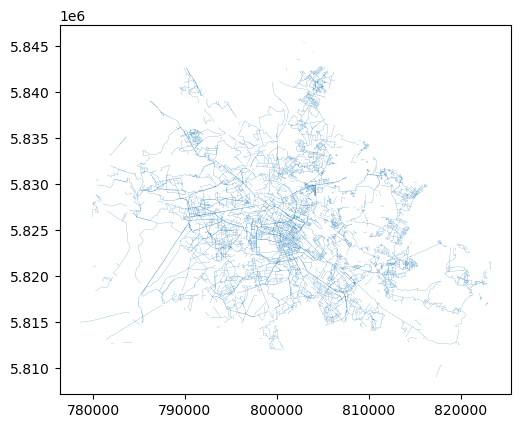

In [18]:
mapillary_buffer_layer = mapillary_clean_clipped.copy()

mapillary_buffer_layer[mapillary_buffer_layer.is_pano==True].plot()

<Axes: >

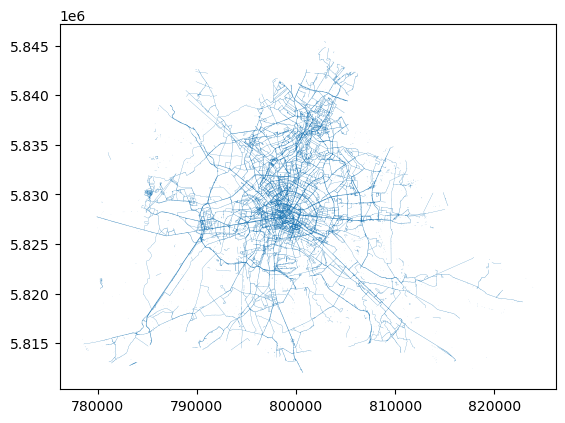

In [19]:
mapillary_buffer_layer = mapillary_clean_clipped.copy()

mapillary_buffer_layer[mapillary_buffer_layer.is_pano==False].plot()

In [ ]:
## germany pano only: Processing roads: 100%|██████████| 15236515/15236515 [1:44:08<00:00, 2438.40it/s]  

## germany all: ~ 10h


from shapely.geometry import box
from tqdm import tqdm

def spatial_filter(gdf, geom):
    idx = gdf.sindex.query(geom, predicate="intersects")
    return gdf.iloc[idx]


#sample=osm_roads_2024_intersect_landuse[:1500].copy()
#sample=osm_roads_2024_intersect_landuse.copy()


clipped_lines = []

clipped_gdf = gpd.GeoDataFrame()

for _, row in tqdm(osm_roads.iterrows(), total=len(osm_roads), desc="Processing roads"):
    bbox = box(*row.geometry.bounds)
    #filtered_polys = mapillary_clean[mapillary_clean.intersects(bbox)]
    filtered_polys = spatial_filter(mapillary_clean, bbox) # 3times faster than intersects
    
    if not filtered_polys.empty:
        clipped = gpd.clip(gpd.GeoDataFrame([row], crs=osm_roads.crs), filtered_polys)
        clipped_lines.append(clipped)

# Combine all results
clipped_gdf = gpd.GeoDataFrame(pd.concat(clipped_lines, ignore_index=True), crs=osm_roads.crs)


Processing roads:  40%|████      | 6105095/15236515 [35:31<30:07, 5052.92it/s]  

In [33]:
clipped_gdf['length_m_after_clip'] = clipped_gdf.geometry.length

clipped_gdf["mp_coverage_ratio"] = clipped_gdf["length_m_after_clip"] / clipped_gdf["length_m_before_clip"]



<Axes: >

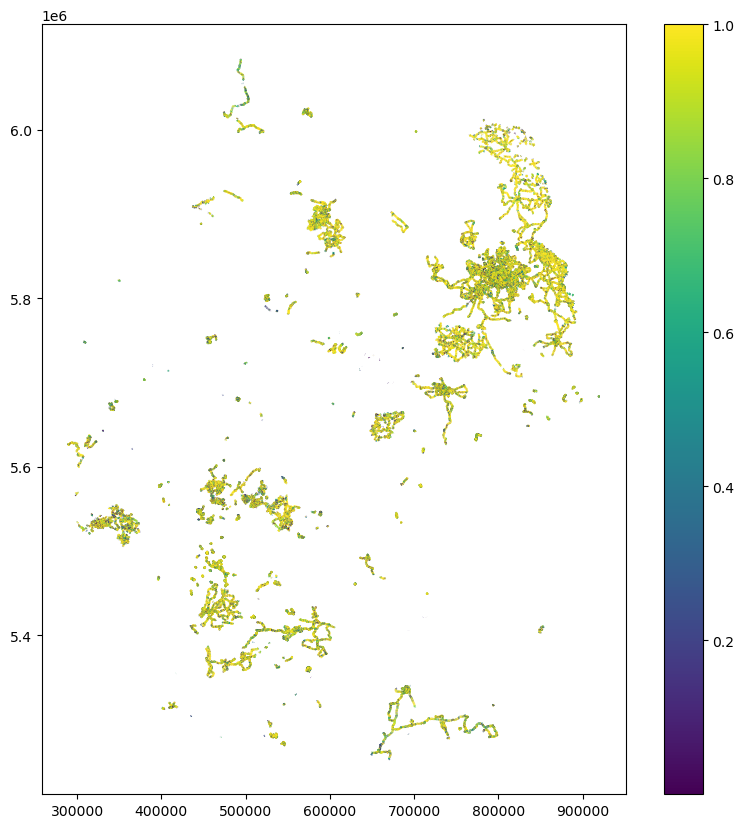

In [16]:
clipped_gdf.plot(column="mp_coverage_ratio", cmap="viridis", legend=True, figsize=(10, 10))

array([[<Axes: title={'center': 'mp_coverage_ratio'}>]], dtype=object)

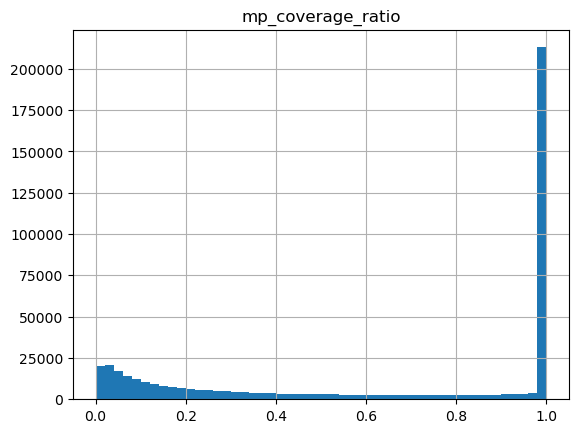

In [17]:
clipped_gdf.hist(column="mp_coverage_ratio", bins=50)

In [18]:
clipped_gdf.columns

Index(['osm_id', 'name', 'highway', 'waterway', 'aerialway', 'barrier',
       'man_made', 'railway', 'z_order', 'other_tags', 'geometry',
       'length_m_before_clip', 'length_m_after_clip', 'mp_coverage_ratio'],
      dtype='object')

In [ ]:
clipped_gdf

In [34]:
#clipped_gdf=clipped_gdf[["id","count_accidents","mp_coverage_ratio", "length_km_before_clip", "length_km_after_clip", "geometry"]].copy()
clipped_gdf=clipped_gdf[["osm_id", "highway", "mp_coverage_ratio", "length_m_before_clip", "length_m_after_clip", "geometry"]].copy()

In [ ]:
#clipped_gdf.to_file("berlin_highways_250401_mp_coverage_ratio.gpkg")
#clipped_gdf.to_file("germany_osm-highways_25-04-05_mp_coverage_25-04-03_ratio.gpkg")


clipped_gdf.to_parquet("germany_osm-highways_25-04-05_mp_pano_coverage_25-04-03_ratio.parquet")
#clipped_gdf.to_parquet("germany_osm-highways_25-04-05_mp_all_coverage_25-04-03_ratio.parquet")